<a href="https://colab.research.google.com/github/LEFT-BEE/KMU-Algorithm/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99/KNN_Pratice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# knn알고리즘을 이용한 irir 데이터 분류

In [45]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## 데이터 전처리 및 시각화

In [ ]:
iris_data = load_iris()
iris_data

target = iris_data['target']
data = iris_data['data']
target_names = iris_data['target_names']

dic = { 0 : target_names[0] , 1 : target_names[1] , 2:target_names[2]}

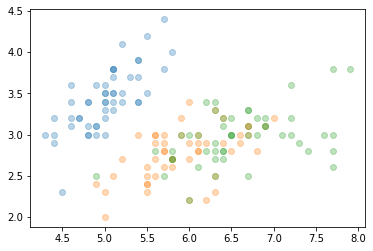

In [43]:
classes = [0 , 1 , 2]

for c in classes:
  X0 = []
  X1 = []
  for d , label in zip(data,target) :
    if label == c:
      X0.append(d[0])
      X1.append(d[1])
  plt.scatter(X0 ,X1 , alpha = 0.3)
plt.show()

## knn 알고리즘 정의 및 모델 학습

In [114]:
def distance(a,b):
  s= 0
  for ai,bi in zip(a,b):
    s += (bi-ai)**2
  return s **0.5

In [122]:
def knn(query ,k, train , target):
  #train데이터 중에서 쿼리와 가장 가까운 k개 찾기
  knns = sorted((distance(point[0] , query), point[1]) for point in zip(train , target))[:k]
  scores = {}
  for dist , label in knns:
    scores[label] = scores.get(label ,0) + 1/(dist+1) 
  resp , score = max(scores.items() , key = lambda x: x[1])
  return resp


query = [5.5 , 2.8 , 4.3 , 3.0]
k = 5
ret = knn(query , 5 , x_train ,y_train)
dic[ret]

'virginica'

### test 

In [143]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True)
def knn_model(knn, x_train , y_trian , x_test , y_test , k):
  correct_cnt = 0
  len_test = len(x_test)
  for i in range(len_test):
    if knn(x_test[i],k,x_train ,y_train) == y_test[i]:
      correct_cnt +=1
  acc = correct_cnt / len_test
  return acc

accuracy = knn_model(knn , x_train , y_train , x_test,  y_test , 3)
print(accuracy)

0.9333333333333333


## Fine tuning : 최적의 k를 찾는다

100%|██████████| 100/100 [03:50<00:00,  2.30s/it]


<function matplotlib.pyplot.show>

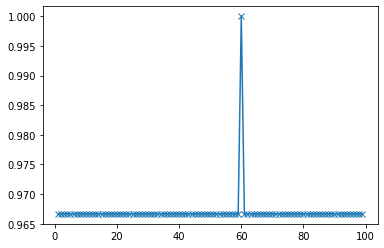

In [148]:
num_trials = 100
train_size = len(x_train)
test_size = len(x_test)

corrects = [0]*100

for _ in tqdm(range(num_trials)):
  x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True ,stratify=target)
  for k in range(1,100):
    corrects[k] = knn_model(knn , x_train , y_train , x_test,  y_test , k)

plt.plot(range(1,100) , corrects[1:] , '-x')
plt.show 